# Finding good probability-change mazes

For probability-change experiments, it can be helpful if all of the mazes used are sufficiently different from each other so the rat cannot run the same/similar paths out of habit.

This notebook walks us through the process of finding a set of sufficiently different mazes from the database to use for probability-change experiments. 

### First, let's load our saved groups of maze configurations

How many groups do we have? How many mazes are in each group?


We have 38208 total mazes good for probability change experiments.
24414 of these mazes have been organized into groups, such that all mazes in a group have at least 10 hexes different on optimal paths.
We have 1355 groups.


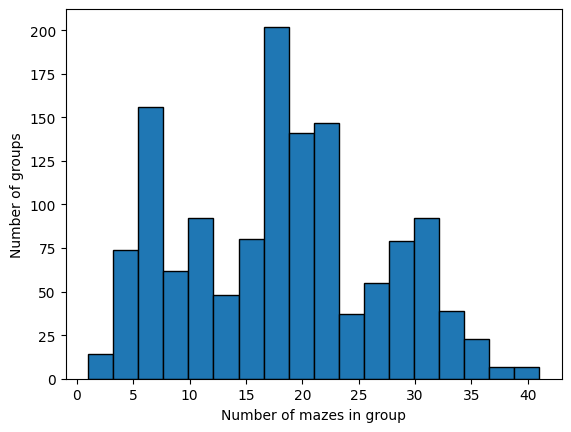

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

# Load the database of good mazes for probability change experiments 
df = pd.read_pickle('../Barrier_sequence_Databases/maze_database_probability_change.pkl')
print(f"We have {len(df)} total mazes good for probability change experiments.")

# Load the list of sets grouping mazes by similarity
groups = pd.read_pickle('maze_groups_incremental2.pkl')
total_mazes_grouped = sum(len(group) for group in groups)

print(f"{total_mazes_grouped} of these mazes have been organized into groups, such that all mazes in a group have at least 10 hexes different on optimal paths.")
print(f"We have {len(groups)} groups.")

# Plot group sizes to get a sense of how many mazes we have per group
group_sizes = [len(group) for group in groups]
plt.hist(group_sizes, bins='auto', edgecolor='black')
plt.xlabel('Number of mazes in group')
plt.ylabel('Number of groups')
plt.show()

### Add a column 'probability_group' to the dataframe
All mazes in the same probability group have at least 10 hexes different on optimal paths when compared to all other mazes in the group

In [34]:
# Add a new column 'probability_group' to the probability change maze dataframe
df['probability_group'] = None

# Map mazes to their respective group numbers
group_mapping = {}

for group_num, group_set in enumerate(groups, start=1):
    for num in group_set:
        group_mapping[num] = group_num

# Apply the mapping to the dataframe, setting the 'probability_group' column based on the index
df['probability_group'] = df.index.map(group_mapping)

# display(df)

### Add a column 'isomorphic_mazes_in_group' to the dataframe

In [35]:
from hex_maze_utils import get_isomorphic_mazes

# Create a column to track if any mazes in the same group are isomorphic to each other
df['isomorphic_mazes_in_group'] = None

# Iterate through each maze in the dataframe
for idx, row in df.iterrows():
    if pd.notna(row['probability_group']):
        # Get a list of all mazes in the same group
        mazes_in_group = df[df['probability_group'] == row['probability_group']]['barriers'].tolist()
        
        # Get isomorphic mazes for the current maze
        isomorphic_mazes = get_isomorphic_mazes(row['barriers'])
        
        # Find if any of these isomorphic mazes are in the group
        overlap = [m for m in isomorphic_mazes if m in mazes_in_group]
        
        # Record the isomorphic mazes in the group in a new column
        df.at[idx, 'isomorphic_mazes_in_group'] = overlap
    else:
        # If the group is None, assign isomorphic_mazes_in_group to an empty list
        df.at[idx, 'isomorphic_mazes_in_group'] = []

# Display the result
display(df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes,probability_group,isomorphic_mazes_in_group
0,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,...",1.0,[]
1,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [20, 16, 12, 15, 19...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ...",1.0,[]
2,"(32, 36, 8, 9, 41, 44, 21, 23, 24)",17,17,23,"[17, 17, 23]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, ...","[[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 1...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{13},1,"[[33, 28, 34, 39, 43, 48]]",1,"{(32, 35, 8, 12, 44, 46, 16, 21, 23), (39, 9, ...",1.0,[]
3,"(9, 10, 42, 44, 13, 18, 22, 25, 30)",15,21,17,"[15, 21, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{31},1,"[[33, 28, 34, 39, 43, 48], [29, 24, 19, 23, 28...",3,"{(37, 40, 9, 45, 20, 25, 27, 28, 31), (37, 7, ...",1.0,[]
4,"(34, 37, 7, 45, 13, 22, 25, 27, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[15, 12, 16, 20, 24, 19]]",1,"{(34, 10, 11, 42, 14, 15, 25, 29, 31), (37, 41...",1.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38203,"(37, 7, 45, 22, 23, 24, 25, 27, 28)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[34, 29, 35, 40, 44, 39], [14, 11, 8, 10, 13,...",2,"{(36, 39, 9, 10, 42, 12, 46, 18, 25), (37, 7, ...",NaN,[]
38204,"(34, 36, 7, 10, 42, 46, 19, 22, 25)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{17},1,[],0,"{(34, 37, 7, 40, 9, 42, 14, 16, 25), (35, 37, ...",NaN,[]
38205,"(37, 7, 9, 13, 45, 16, 22, 25, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[33, 28, 34, 39, 43, 48]]",1,"{(32, 34, 40, 13, 15, 25, 26, 27, 31), (36, 10...",NaN,[]
38206,"(39, 7, 46, 17, 19, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(32, 36, 7, 40, 11, 14, 17, 20, 23), (32, 36,...",NaN,[]


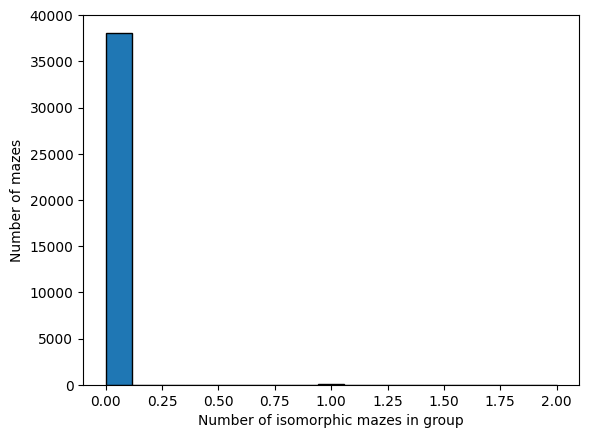

In [42]:
# How many groups contain isomorphic mazes, anyway?

# Plot the number of isomorphic mazes in a group for each maze
num_iso_mazes = [len(iso_mazes) for iso_mazes in df['isomorphic_mazes_in_group'].tolist()]
plt.hist(num_iso_mazes, bins='auto', edgecolor='black')
plt.xlabel('Number of isomorphic mazes in group')
plt.ylabel('Number of mazes')
plt.show()

# Pretty much no mazes have isomorphic mazes in their same group, so this seems to be a non issue!

### Let's plot a group from our database.

See [`Plotting_Hex_Mazes.ipynb`](Plotting_Hex_Mazes.ipynb) for a complete description of plotting options.

There are 39 mazes in group 1:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes,probability_group,isomorphic_mazes_in_group
0,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,...",1.0,[]
1,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [20, 16, 12, 15, 19...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ...",1.0,[]
2,"(32, 36, 8, 9, 41, 44, 21, 23, 24)",17,17,23,"[17, 17, 23]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, ...","[[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 1...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{13},1,"[[33, 28, 34, 39, 43, 48]]",1,"{(32, 35, 8, 12, 44, 46, 16, 21, 23), (39, 9, ...",1.0,[]
3,"(9, 10, 42, 44, 13, 18, 22, 25, 30)",15,21,17,"[15, 21, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{31},1,"[[33, 28, 34, 39, 43, 48], [29, 24, 19, 23, 28...",3,"{(37, 40, 9, 45, 20, 25, 27, 28, 31), (37, 7, ...",1.0,[]
4,"(34, 37, 7, 45, 13, 22, 25, 27, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[15, 12, 16, 20, 24, 19]]",1,"{(34, 10, 11, 42, 14, 15, 25, 29, 31), (37, 41...",1.0,[]
5,"(39, 8, 13, 46, 18, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 5, 7, 9, 12, 16, 20, 25, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 25, 21, 26, 31, 3...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 20, 25, 21, 26, 31, 3...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(39, 8, 41, 9, 45, 16, 21, 27, 29), (32, 35, ...",1.0,[]
6,"(32, 37, 8, 40, 9, 11, 16, 21, 28)",19,21,15,"[19, 21, 15]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 3...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{36},1,"[[24, 20, 25, 30, 35, 29]]",1,"{(34, 39, 8, 42, 12, 46, 26, 27, 30), (37, 7, ...",1.0,[]
8,"(34, 36, 9, 10, 42, 46, 22, 23, 30)",15,19,19,"[15, 19, 19]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 25, 20, 24, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","{17, 20, 21}",3,"[[20, 16, 12, 15, 19, 24], [20, 25, 21, 17, 13...",2,"{(32, 34, 41, 10, 9, 21, 23, 26, 27), (35, 37,...",1.0,[]
9,"(34, 37, 8, 45, 15, 17, 27, 28, 30)",19,17,21,"[19, 17, 21]",4,"[[1, 4, 5, 7, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 29, 35, 40, ...","[[2, 49, 47, 42, 46, 41, 36, 31, 26, 21, 25, 2...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 21, 26, 31, ...",{20},1,"[[13, 10, 7, 9, 12, 16]]",1,"{(34, 36, 8, 10, 42, 44, 15, 18, 20), (37, 9, ...",1.0,[]
11,"(34, 37, 40, 10, 46, 15, 14, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{16},1,[],0,"{(34, 37, 41, 10, 12, 18, 20, 23, 25), (34, 37

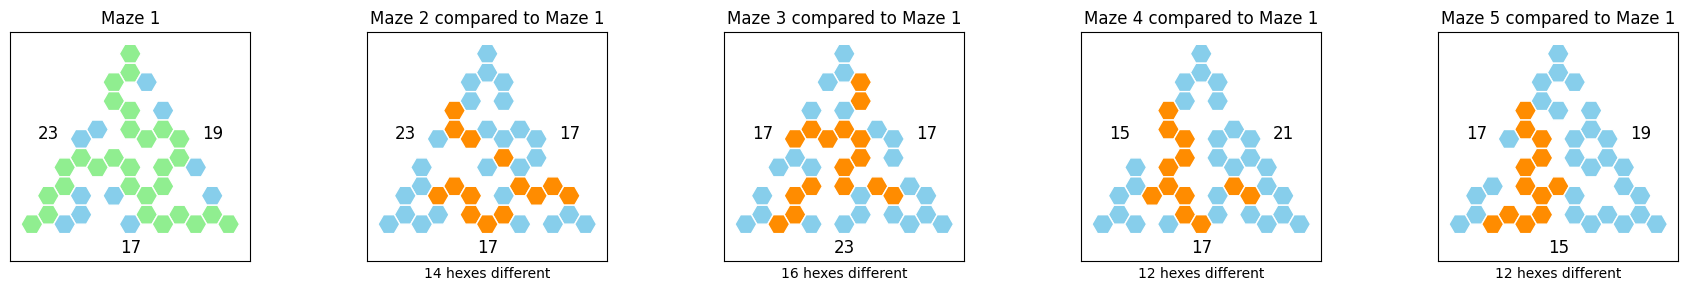

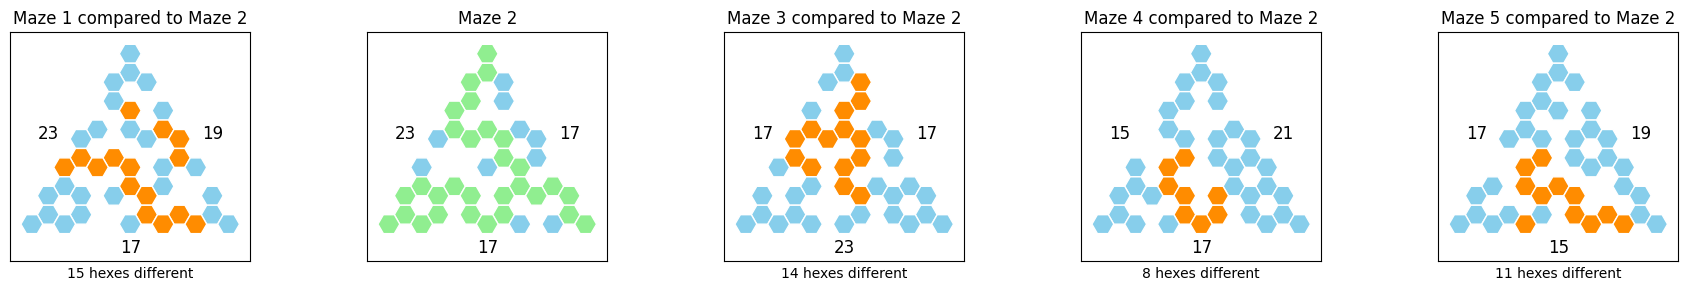

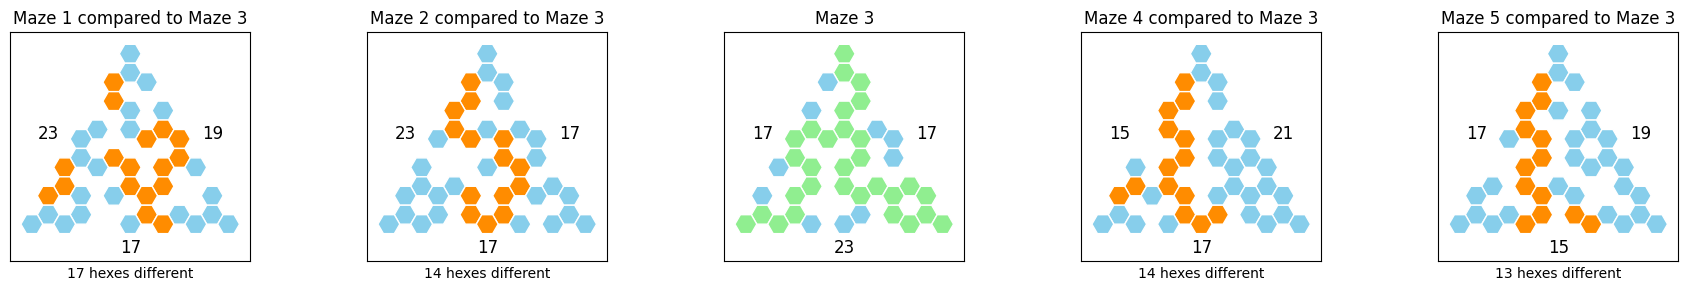

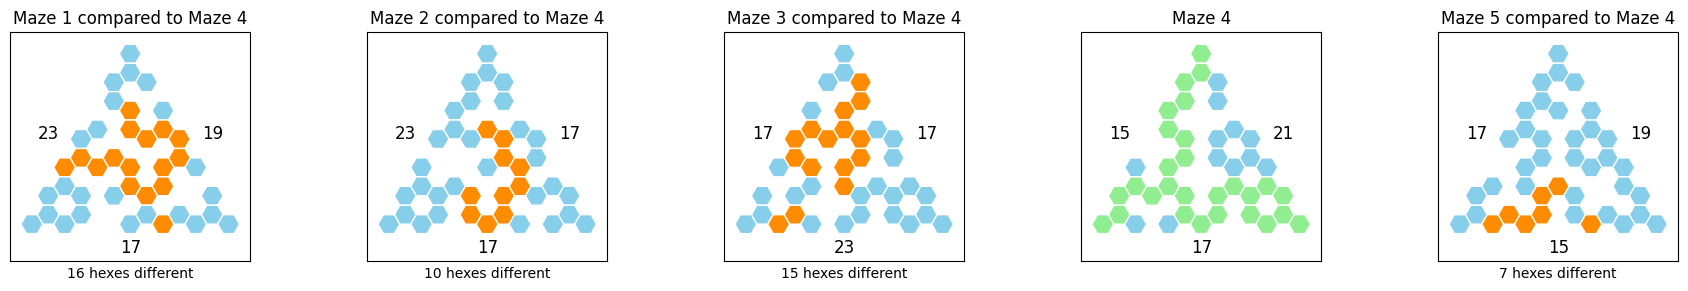

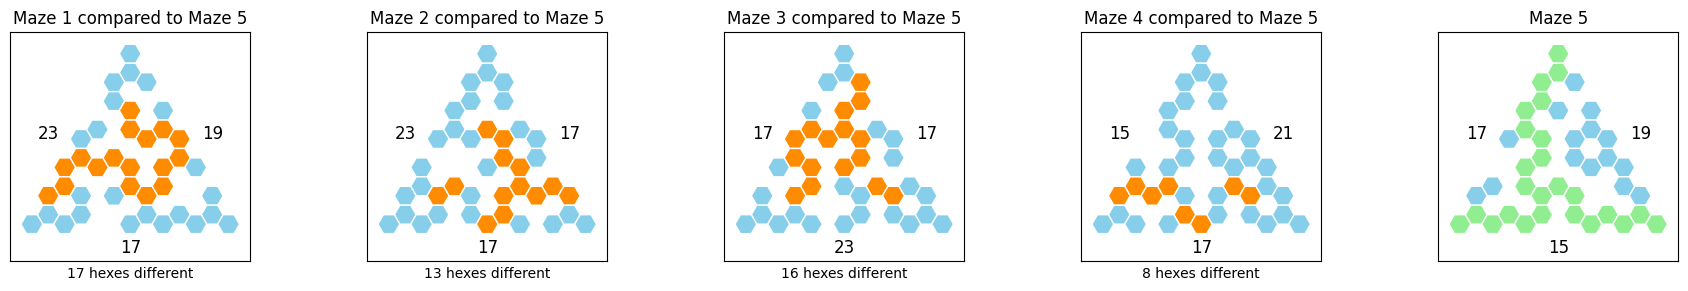

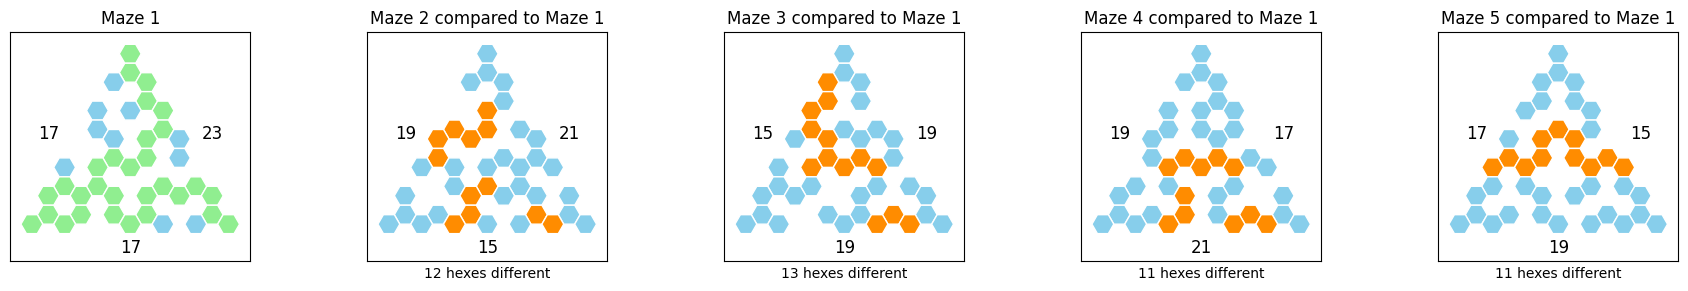

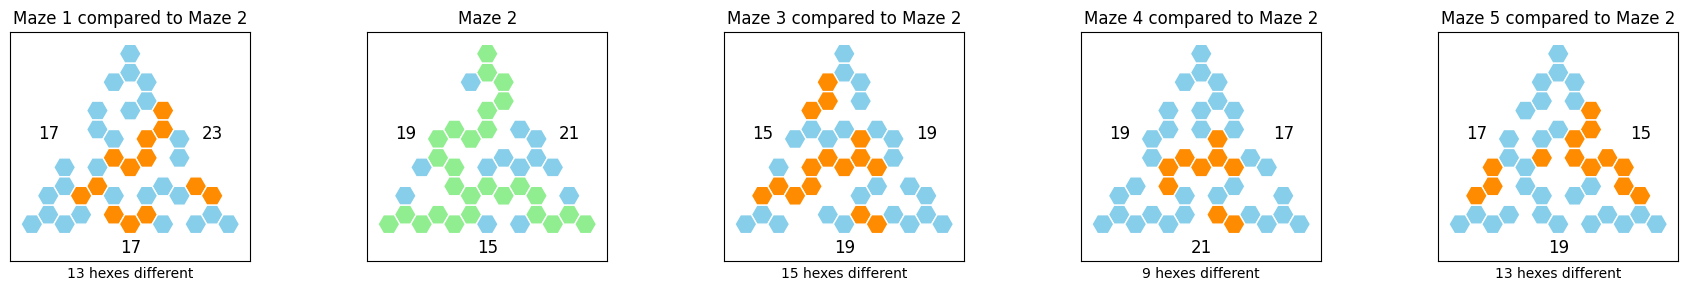

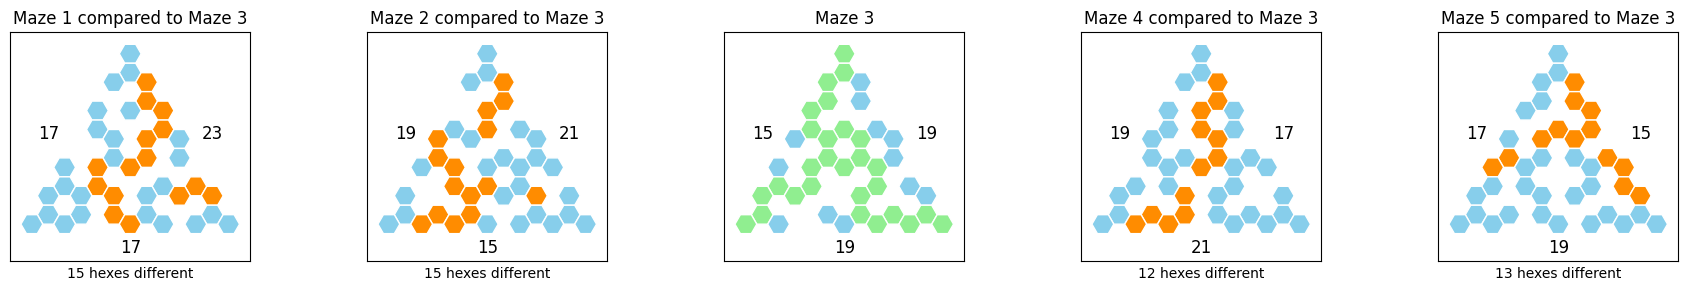

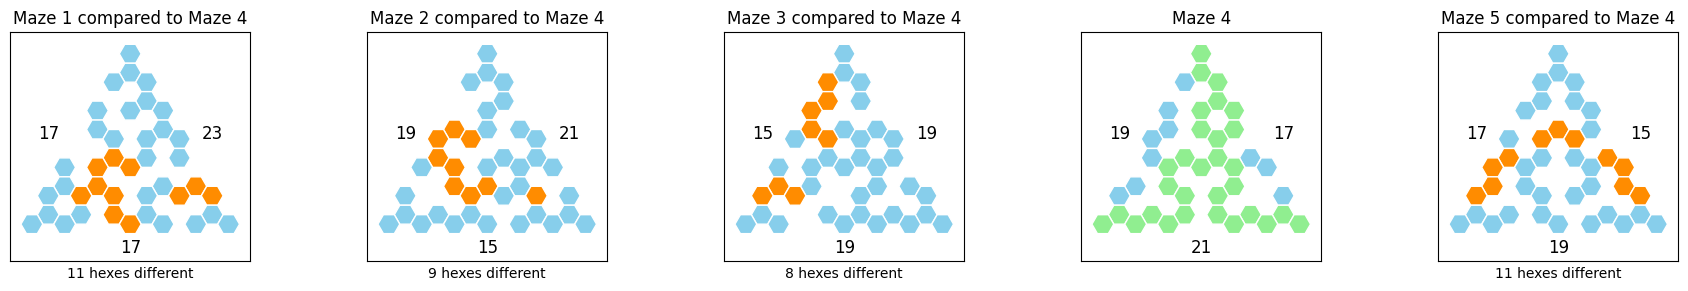

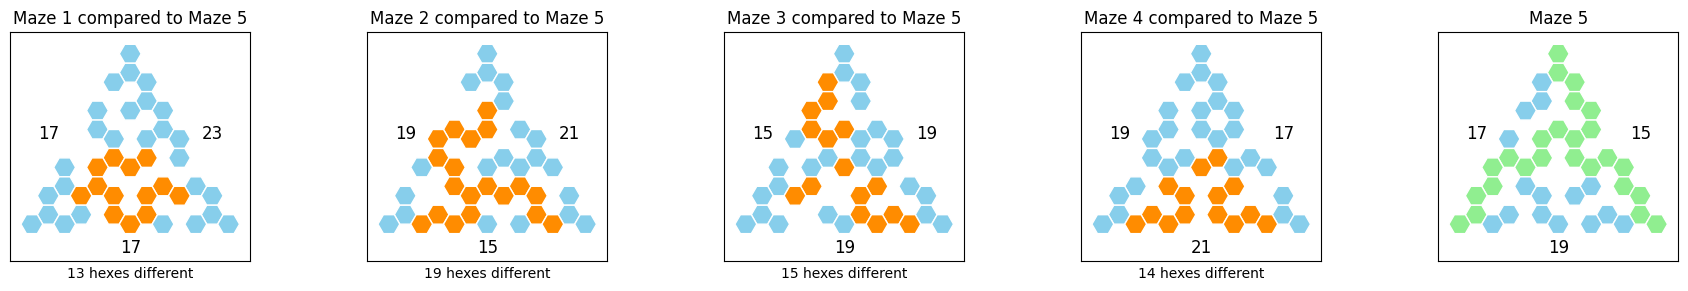

In [38]:
from hex_maze_utils import plot_evaluate_maze_sequence

# Load a group from the database
group_num = 1
df_group = df[df['probability_group'] == group_num]
print(f"There are {len(df_group)} mazes in group {group_num}:")
display(df_group)

# Get a list of mazes in this group
mazes_in_group = df_group['barriers'].tolist()

# Plot a comparison of the first 5 mazes in the group 
# (change these numbers to plot other comaprisons, the graph just gets small for >10 at a time)
plot_evaluate_maze_sequence(mazes_in_group[0:5])

# Plot the next 5
plot_evaluate_maze_sequence(mazes_in_group[5:10])

In [43]:
# Save this database!

save = False # be warned that saving will overwrite already saved files of the same name

if save:
    # Save the database as a CSV for readability without loading in a notebook
    df.to_csv(f'../Barrier_Sequence_Databases/probability_change_mazes_DUPLICATE.csv', index=False)
    
    # Also save the database using pickle - this preserves datatypes and metadata for loading in notebooks
    df.to_pickle(f'../Barrier_Sequence_Databases/probability_change_mazes_DUPLICATE.pkl')